# PROJECT TITANIC - EXPLORATORY ANALYSIS - [PYTHON]

## I. IMPORT DE LA BASE ET SET UP

In [1]:
#Import des librairies necessaires
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import re
import collections
#%matplotlib inline 
sns.set(color_codes=True)
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Import de la base
train=pd.read_csv("/Users/Aida/Documents/1. Projets/Data Science/Kaggle/Titanic/train.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## I* AJOUT DE VARIABLES

### La variable de titres
(Idée prise directement du tuto R de Rachel sur Kaggle, seule modification potentielle est sur la qualification des titres rares)

In [34]:
#On récupère le titre de la variable Name. Clé: le titre se termine par un point. On récupère tout ce qui se situe avant.
train['Title']=train['Name'].str.extract(pat = '(\w+)(\\.)')[0]
train['Title']
train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [4]:
#On inspecte la variable créée
train.Title.unique()
collections.Counter(train.Title)

Counter({'Mr': 517,
         'Mrs': 125,
         'Miss': 182,
         'Master': 40,
         'Don': 1,
         'Rev': 6,
         'Dr': 7,
         'Mme': 1,
         'Ms': 1,
         'Major': 2,
         'Lady': 1,
         'Sir': 1,
         'Mlle': 2,
         'Col': 2,
         'Capt': 1,
         'Countess': 1,
         'Jonkheer': 1})

In [5]:
train[train.Title=="Mlle"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,Mlle
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C,Mlle


In [6]:
train[train.Title=="Mme"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3,B35,C,Mme


In [7]:
train[train.Title=="Major"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.50,C104,S,Major
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.55,B38,S,Major


In [8]:
#On simplifie la variable Titre par des grandes catégories
train["C_Title"]=[i if i=="Mr" or i=="Mrs" or i=="Miss" or i=="Master" or i=="Dr" else 'Rare' for i in train["Title"]]

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,C_Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Mr


## II. VÉRIFICATIONS

In [9]:
#Vérification de la cohérence des variables
train.dtypes
### NB: Parch=Parents/Children ; SibSp= Sibling/Spouse

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
C_Title         object
dtype: object

In [10]:
##Corrections/Ajouts (fac)
train["N_Sex"]=[1 if i=="male" else 0 for i in train["Sex"]]
train["N_Fam"]=[i + j for (i,j) in zip(train["Parch"],train["SibSp"])]
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,C_Title,N_Sex,N_Fam
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,1,0


In [11]:
#Repérer et éliminer les duplicatas
train.shape

##Combien?
duplicates= train[train.duplicated()]
print("number of duplicate rows: " , duplicates.shape)
###pas de duplicata

number of duplicate rows:  (0, 16)


In [12]:
#Gérer les missing values
print(train.isnull().sum())
###Il y a beaucoup de missing dans l'âge et quelques unes
### dans Embarked. On inspecte d'abord les missing pour 
### l'âge puis pour Embarked mais cela pourra être plus laborieux
### et potentiellement moins utile.
### il y en a aussi dans Cabin mais on ne la retient pas comme une variable d'intérêt.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
C_Title          0
N_Sex            0
N_Fam            0
dtype: int64


In [13]:
age_na=train[train.isna().Age]
age_na.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,N_Sex,N_Fam
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,0.700565,0.745763
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608,0.459310,2.052658
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000,0.000000,0.000000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000,1.000000,0.000000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000,1.000000,0.000000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000,1.000000,10.000000


In [14]:
print(age_na)
### Il y a un nombre de personnes dont les patronymes ne semblent pas britanniques assez important, 
### il peut être intéressant de voir si c'est une variable qui a pu compter dans le fait de survivre ou pas.

     PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Tic

In [15]:
train.describe()
### Quand on compare les deux, on voit que les Na sont:
### Qu'ils ont moins survécu
### Avec un ticket un peu moins élevé
### Avec un peu moins de famille

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,N_Sex,N_Fam
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,10.000000


In [16]:
#Pour l'instant, on fait l'analyse en remplaçant l'âge manquant par l'âge moyen
train['Age_f']=train.Age.fillna(train.mean().Age)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,C_Title,N_Sex,N_Fam,Age_f
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,1,1,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,0,1,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,0,0,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,0,1,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,1,0,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,Rare,1,0,27.000000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Miss,0,0,19.000000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,Miss,0,3,29.699118
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Mr,1,0,26.000000


## III. ANALYSES EXPLORATOIRES
Pour repérer les variables qui peuvent avoir une influence sur les chances de survie, on fait des analyses qui comparent les dispersions des variables dans les deux groupes

### A. Dispersions 

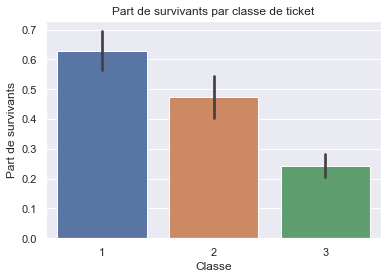

In [17]:
##Pclass: la classe des passagers
sns.barplot(data=train,x='Pclass',y="Survived")
plt.title("Part de survivants par classe de ticket")
plt.xlabel("Classe")
plt.ylabel("Part de survivants")
plt.show()

### La part de survivants parmi 
### les personnes en première classe est beaucoup plus importante
### que parmi les personnes en deuxième et troisième classe

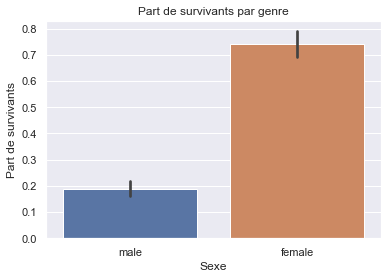

In [18]:
##Sex: le genre des passagers
sns.barplot(data=train,x='Sex',y="Survived")
plt.title("Part de survivants par genre")
plt.xlabel("Sexe")
plt.ylabel("Part de survivants")
plt.show()

### La part de survivants parmi 
### les femmes est beaucoup plus importante que parmi les hommes
### on retient cette variable comme une variable d'intérêt

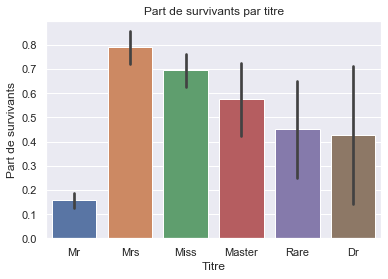

In [19]:
##Title: le titre des passagers
sns.barplot(data=train,x='C_Title',y="Survived")
plt.title("Part de survivants par titre")
plt.xlabel("Titre")
plt.ylabel("Part de survivants")
plt.show()
### à améliorer en groupant les titres par catégories

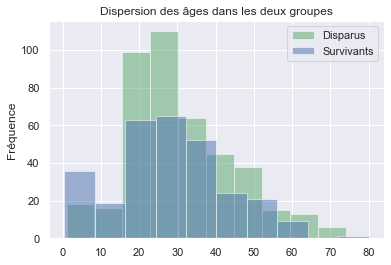

In [24]:
##Age: la distribution des âges parmi les survivants et les autres
x1 = train.loc[train.Survived==0, 'Age']
x2 = train.loc[train.Survived==1, 'Age']

kwargs = dict(alpha=0.5, bins=10)

plt.hist(x1, **kwargs, color='g', label='Disparus')
plt.hist(x2, **kwargs, color='b', label='Survivants')

plt.gca().set(title='Dispersion des âges dans les deux groupes', ylabel='Fréquence')
plt.legend()

plt.show()

### La distribution est à peu près similaire, avec une légère
### sur-représentation des très jeunes (0-18 ans) et une sous représentation
### des jeunes adultes (20-30 ans) parmi les survivants.
### On garde l'âge comme une variable d'intérêt

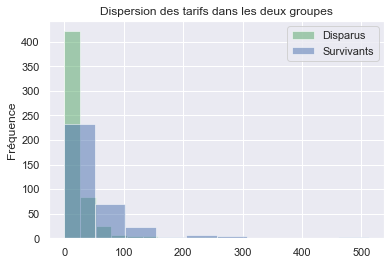

In [25]:
##Fare
x1 = train.loc[train.Survived==0, 'Fare']
x2 = train.loc[train.Survived==1, 'Fare']

kwargs = dict(alpha=0.5, bins=10)

plt.hist(x1, **kwargs, color='g', label='Disparus')
plt.hist(x2, **kwargs, color='b', label='Survivants')

plt.gca().set(title='Dispersion des tarifs dans les deux groupes', ylabel='Fréquence')
plt.legend()

plt.show()

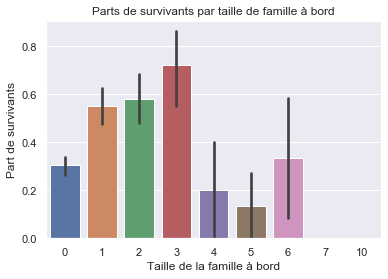

In [26]:
##N_Fam: le nombre de personnes dans la famille
sns.barplot(data=train,x='N_Fam',y="Survived")
plt.xlabel("Taille de la famille à bord")
plt.ylabel("Part de survivants")
plt.title("Parts de survivants par taille de famille à bord")
plt.show()

### Les personnes qui ont une famille entre 1 et 3 personnes semblent 
### avoir des chances de survie plus élevées que les autres groupes